In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set(style='white',font='sans-serif',font_scale=1.5)

In [145]:
from glob import glob

In [146]:
name = glob('./results/braf/*.pkl')[0]
df = pd.read_pickle(name)
eps = 800
df = df[df.Epoch < eps]




df.alpha.unique()

array([0.   , 0.001, 0.01 , 0.05 , 0.1  , 0.2  , 0.3  , 0.4  , 0.5  ,
       0.6  , 0.7  , 0.8  , 0.9  , 1.   ])

In [147]:
cols = [0., 0.01 ,  0.05,  0.1 , 0.2, 0.5  , 1.   ]

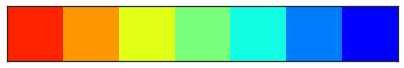

In [148]:
color = sns.color_palette("jet_r", len(cols), desat = 1).as_hex() #PiYG
sns.palplot(color)

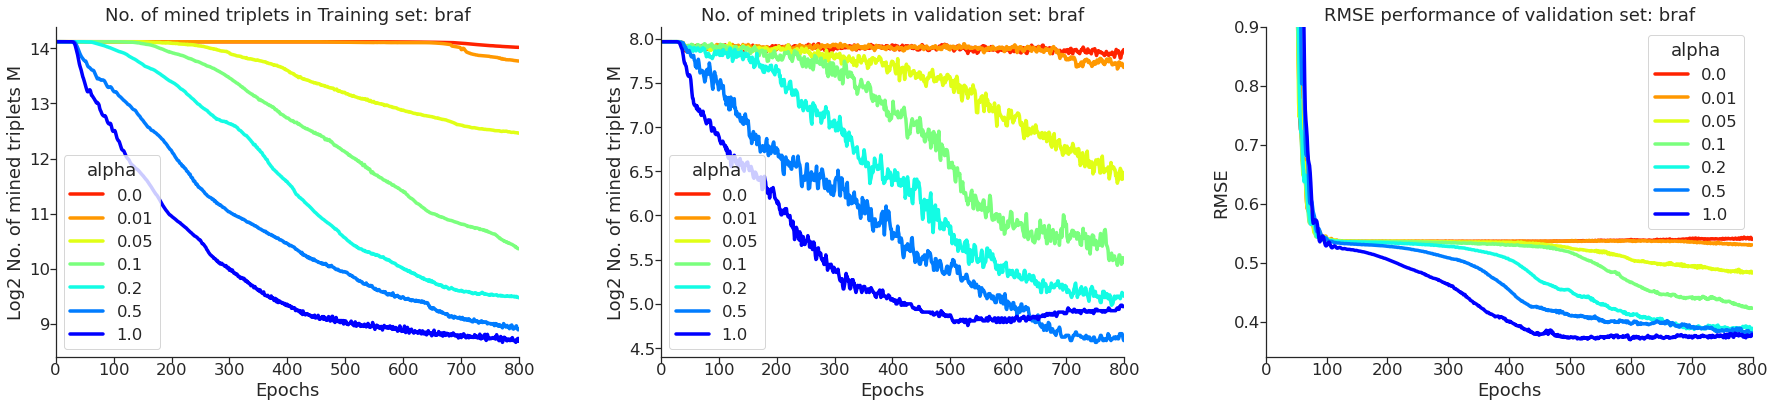

In [149]:
window = 1
lw = 3.5

fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(25, 6), gridspec_kw = {'width_ratios':[1,1,1.05]})


dataset = df.dataset.iloc[0]

df1 = df.groupby(['alpha', 'Epoch']).mean()
df1 = df1.reset_index().groupby(['alpha',  'Epoch']).mean()
dfp1 = df1['train_pos_triplets'].unstack().T
dfp1 = dfp1.astype(int)
dfp1 = dfp1[cols]
dfp1.columns.name = 'alpha'
dfp1 = np.log2(dfp1+1)

dfp1.rolling(window).mean().plot(ax=ax1, lw = lw, color=color)
ax1.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
#ax1.set_ylim(0.4, 1.0)

ax1.set_ylabel('Log2 No. of mined triplets M')
ax1.set_xlabel('Epochs')

from matplotlib.ticker import FuncFormatter
#ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: "%.2fM" % (float(y)/1000000) )) 

ax1.set_title('No. of mined triplets in Training set: %s' % dataset)


window = 3


df1 = df.groupby(['alpha', 'Epoch']).mean()
df1 = df1.reset_index().groupby(['alpha',  'Epoch']).mean()
dfp1 = df1['val_pos_triplets'].unstack().T
dfp1 = dfp1.astype(int)
dfp1 = np.log2(dfp1+1)

dfp2 = df1['val_rmse'].unstack().T

dfp1 = dfp1[cols]
dfp2 = dfp2[cols]

dfp1.columns.name = 'alpha'
dfp2.columns.name = 'alpha'


dfp1.rolling(window).mean().plot(ax=ax2, lw = lw,color=color)
dfp2.rolling(window).mean().plot(ax=ax3, lw = lw, color=color)

ax3.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
ax2.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)

ax3.set_ylabel('RMSE')
ax3.set_xlabel('Epochs')

ax2.set_ylabel('Log2 No. of mined triplets M')
ax2.set_xlabel('Epochs')

ax3.set_title('RMSE performance of validation set: %s' % dataset)
ax2.set_title('No. of mined triplets in validation set: %s' % dataset)

#ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: "%sK" % (float(y)/1000) )) 


ax3.set_ylim(0.34, 0.90)

#ax2.set_yticks(np.linspace(8.95, 10.95, 5))
#ax1.set_yticks(np.linspace(13, 17, 5))

ax1.set_xlim(0, eps)
ax2.set_xlim(0, eps)
ax3.set_xlim(0, eps)


sns.despine(top=True, right=True, left=False, bottom=False)

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)

plt.savefig('./altering_alpha_%s_rmse.pdf' % dataset, bbox_inches='tight', dpi=400)

In [150]:
import torch

In [151]:
(torch.zeros(1).sum() == 0).float()

tensor(1.)

In [152]:
torch.Tensor(0)

tensor([])